<h1>Trawler Logistic Regression Model</h1>

<h2>Import Modules</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import model_selection
import pylab as pl

<h2>Data Pre-Processing</h2>

In [2]:
#Load all the data into numpy arrays
trawler_data = np.load('../datasets/measures/kristina_trawl.measures.npz')

#Move _data['x'][:] into _x[:]
trawler_data = trawler_data['x']

#Convert into Pandas data frame
trawler_data = pd.DataFrame(trawler_data)

In [3]:
#drop unknown fishing points
trawler_data['classification'].astype(int)
trawler_data = trawler_data[trawler_data['classification'] != -1]

#drop duplicate rows
trawler_data.drop_duplicates()

,measure_coursestddev_1800_log,measure_courseavg_43200,course,measure_sin_course,measure_daylightavg_900,measure_speedstddev_10800,speed,measure_pos_86400,measure_daylightavg_43200,measure_latavg_86400,...,measure_speedavg_21600,measure_count_900,measure_speedstddev_86400_log,measure_lonavg_10800,measure_speedstddev_10800_log,lat,measure_speedstddev_43200_log,measure_pos_21600,measure_speedstddev_900_log,measure_speedstddev_1800_log
84,-3.000000,0.153641,47.400002,0.520499,0.0,2.122360e-03,0.0,0.000066,0.0,-12.039737,...,0.998643,2.0,-2.450122,-77.140023,-2.505517,-12.039750,-2.450122,0.000066,-3.000000,-3.000000
178,-3.000000,0.131667,47.400002,0.520499,0.0,2.192224e-03,0.1,0.000058,0.0,-12.039730,...,0.996895,2.0,-2.410972,-77.140024,-2.495907,-12.039866,-2.407936,0.000052,-2.999995,-3.000000
180,-3.000000,0.131667,47.400002,0.520499,0.0,2.192224e-03,0.1,0.000058,0.0,-12.039731,...,0.996807,2.0,-2.409956,-77.140025,-2.495907,-12.039750,-2.407936,0.000053,-2.999995,-3.000000
182,-3.000000,0.131667,47.400002,0.520499,0.0,2.192224e-03,0.1,0.000058,0.0,-12.039731,...,0.996807,2.0,-2.409052,-77.140022,-2.495907,-12.039766,-2.407936,0.000053,-2.999995,-3.000000
184,-3.000000,0.131667,47.400002,0.520499,0.0,2.192224e-03,0.1,0.000058,0.0,-12.039731,...,0.996639,2.0,-2.408250,-77.140032,-2.495907,-12.039700,-2.406520,0.000054,-2.999995,-3.000000
186,-3.000000,0.131667,47.400002,0.520499,0.0,2.192224e-03,0.1,0.000058,0.0,-12.039731,...,0.996471,2.0,-2.407543,-77.140035,-2.495907,-12.039733,-2.405466,0.000054,-2.999995,-3.000000
188,-3.000000,0.131667,47.400002,0.520499,0.0,2.192224e-03,0.1,0.000058,0.0,-12.039730,...,0.996471,2.0,-2.406924,-77.140039,-2.495907,-12.039717,-2.404766,0.000054,-2.999995,-3.000000
190,-3.000000,0.131667,47.400002,0.520499,0.0,1.625796e-03,0.1,0.000058,0.0,-12.039731,...,0.996471,4.0,-2.406386,-77.140041,-2.580739,-12.039750,-2.404418,0.000054,-3.000000,-3.000000
192,-3.000000,0.131667,47.400002,0.520499,0.0,1.625796e-03,0.1,0.000057,0.0,-12.039731,...,0.994608,2.0,-2.405923,-77.140045,-2.580739,-12.039750,-2.404374,0.000060,-2.999995,-3.000000
206,-3.000000,0.131667,47.400002,0.520499,1.0,3.161014e-08,0.1,0.000056,0.0,-12.039731,...,0.994588,2.0,-2.404395,-77.140052,-2.999986,-12.039750,-2.411884,0.000053,-2.999995,-3.000000


In [4]:
# create dataframes with an intercept column and dummy variables for
# occupation and occupation_husb
y, X = dmatrices('classification ~ measure_courseavg_10800 + measure_courseavg_1800 + measure_courseavg_21600 + measure_courseavg_3600 + measure_courseavg_43200 + measure_courseavg_86400 + measure_coursestddev_10800 + measure_coursestddev_1800 + measure_coursestddev_21600 + measure_coursestddev_3600 + measure_coursestddev_43200 + measure_coursestddev_86400 + measure_pos_10800 + measure_pos_1800 + measure_pos_21600 + measure_pos_3600 + measure_pos_43200 + measure_pos_86400 + measure_speedavg_10800 + measure_speedavg_1800 + measure_speedavg_21600 + measure_speedavg_3600 + measure_speedavg_43200 + measure_speedavg_86400 + measure_speedstddev_10800 + measure_speedstddev_1800 + measure_speedstddev_21600 + measure_speedstddev_3600 + measure_speedstddev_43200 + measure_speedstddev_86400', trawler_data, return_type="dataframe")
print X.columns
y = np.ravel(y)

Index([u'Intercept', u'measure_courseavg_10800', u'measure_courseavg_1800',
       u'measure_courseavg_21600', u'measure_courseavg_3600',
       u'measure_courseavg_43200', u'measure_courseavg_86400',
       u'measure_coursestddev_10800', u'measure_coursestddev_1800',
       u'measure_coursestddev_21600', u'measure_coursestddev_3600',
       u'measure_coursestddev_43200', u'measure_coursestddev_86400',
       u'measure_pos_10800', u'measure_pos_1800', u'measure_pos_21600',
       u'measure_pos_3600', u'measure_pos_43200', u'measure_pos_86400',
       u'measure_speedavg_10800', u'measure_speedavg_1800',
       u'measure_speedavg_21600', u'measure_speedavg_3600',
       u'measure_speedavg_43200', u'measure_speedavg_86400',
       u'measure_speedstddev_10800', u'measure_speedstddev_1800',
       u'measure_speedstddev_21600', u'measure_speedstddev_3600',
       u'measure_speedstddev_43200', u'measure_speedstddev_86400'],
      dtype='object')


In [5]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)
trawler_model = LogisticRegression()
trawler_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [6]:
# examine the coefficients
pd.DataFrame(zip(X.columns, np.transpose(trawler_model.coef_)))

,0,1
0,Intercept,[0.122378159662]
1,measure_courseavg_10800,[-0.371817739163]
2,measure_courseavg_1800,[-0.327048906864]
3,measure_courseavg_21600,[-0.340147614152]
4,measure_courseavg_3600,[0.0695316805656]
5,measure_courseavg_43200,[0.82493037292]
6,measure_courseavg_86400,[-2.06590151948]
7,measure_coursestddev_10800,[0.113123912787]
8,measure_coursestddev_1800,[-0.998654517579]
9,measure_coursestddev_21600,[1.23564316028]


In [7]:
# calculate null accuracy in a single line of code
max(y_test.mean(), 1 - y_test.mean())

0.50219527819877818

In [8]:
# predict class labels for the test set
predicted = trawler_model.predict(X_test)
print predicted
print predicted.mean()

[ 0.  1.  0. ...,  1.  0.  0.]
0.556147560194


In [9]:
# generate class probabilities
probs = trawler_model.predict_proba(X_test)
print probs

[[ 0.92078397  0.07921603]
 [ 0.12242546  0.87757454]
 [ 0.54344847  0.45655153]
 ..., 
 [ 0.39890616  0.60109384]
 [ 0.96290045  0.03709955]
 [ 0.79422129  0.20577871]]


In [10]:
# generate evaluation metrics
print metrics.accuracy_score(y_test, predicted)
print metrics.roc_auc_score(y_test, probs[:, 1])

0.787284573679
0.859039675951


('Sensitivity:', 0.8449466415568111)
('Specificity:', 0.73025108117357895)
None


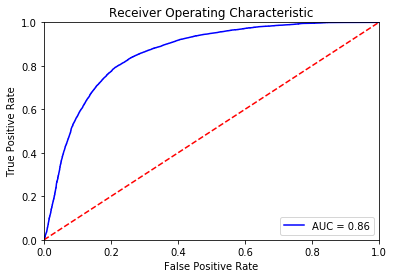

In [11]:
# calculate the fpr and tpr for all thresholds of the classification
probs = trawler_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

print evaluate_threshold(0.5)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Area Under Curve: 0.82


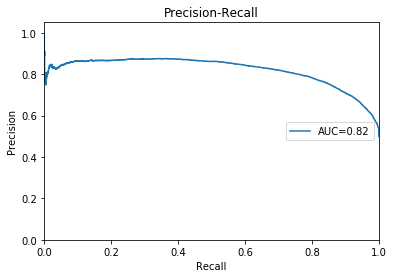

In [12]:
# Compute Precision-Recall and plot curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, preds)
area = metrics.auc(recall, precision)
print "Area Under Curve: %0.2f" % area

pl.clf()
pl.plot(recall, precision, label='AUC=%0.2f' % area)
pl.xlabel('Recall')
pl.ylabel('Precision')
pl.ylim([0.0, 1.05])
pl.xlim([0.0, 1.0])
pl.title('Precision-Recall' )
pl.legend(loc="center right")
pl.show()

In [13]:
# define a function that accepts a threshold and prints sensitivity and specificity
#def evaluate_threshold(threshold):
#    print('Sensitivity:', tpr[thresholds > threshold][-1])
#    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

#for t in range(0,100):
#    print 0.005*t
#    evaluate_threshold(0.005*t)

In [14]:
print metrics.confusion_matrix(y_test, predicted)
print metrics.classification_report(y_test, predicted)

[[23467  8674]
 [ 4940 26920]]
             precision    recall  f1-score   support

        0.0       0.83      0.73      0.78     32141
        1.0       0.76      0.84      0.80     31860

avg / total       0.79      0.79      0.79     64001



In [15]:
# evaluate the model using 10-fold cross-validation
scores = model_selection.cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[ 0.67207275  0.80106872  0.82900534  0.83275523  0.83406769  0.86369176
  0.83452866  0.84151315  0.57999344  0.60524095]
0.769393768244


In [16]:
#cross_val_score(LogisticRegression(), X, y, cv=10, scoring='roc_auc').mean()